### Student Information
Name: 郭芝伶 Alicia Kurniawan

Student ID: 108006206

GitHub ID: https://github.com/aliciakurniawan

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [298]:
### Begin Assignment Here

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Second
follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__

## 1. The Data
This section contains: importing the data.

In [299]:
# Import data
import numpy as np
pathname = './sentiment labelled sentences/'
data_imdb = np.loadtxt(pathname+'imdb_labelled.txt', delimiter='  \t', dtype=str)
data_yelp = np.loadtxt(pathname+'yelp_labelled.txt', delimiter='\t', dtype=str)
data_amzn = np.loadtxt(pathname+'amazon_cells_labelled.txt', delimiter='\t', dtype=str)

# Combine whole data into one
data = np.append(data_imdb, data_yelp, axis=0)
data = np.append(data, data_amzn, axis=0)

## 2. Data Preparation
This section contains: creating labels for the data.

In [300]:
categories = ['sentence', 'score']

## 3. Data Transformation
This section contains: converting the data into a Pandas Dataframe.

In [301]:
# Convert data into pandas dataframe
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(data, columns= categories)
X

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
2994,The screen does get smudged easily because it ...,0
2995,What a piece of junk.. I lose more calls on th...,0
2996,Item Does Not Match Picture.,0
2997,The only thing that disappoint me is the infra...,0


In [302]:
# Printing out the text data
for i in X['sentence'][:3]:
    print(i)
    print('\n' + '-' * 20 + '\n')

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.

--------------------

Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.

--------------------

Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.

--------------------



In [303]:
# Querying the data
X[X.score == '1'][:10] # First 10 positive sentences

,sentence,score
4,The best scene in the movie was when Gerardo i...,1
7,Saw the movie today and thought it was a good ...,1
9,Loved the casting of Jimmy Buffet as the scien...,1
10,And those baby owls were adorable.,1
11,The movie showed a lot of Florida at it's best...,1
12,The Songs Were The Best And The Muppets Were S...,1
13,It Was So Cool.,1
14,"This is a very ""right on case"" movie that deli...",1
16,"This review is long overdue, since I consider ...",1
17,I'll put this gem up against any movie in term...,1


In [304]:
# Querying how many negative sentences in the dataset?
len(X[X.score == '0']) 

1500

In [305]:
# Using iloc to query every 10th data
X.loc[::10, 'sentence'][:10]

0     A very, very, very slow-moving, aimless movie ...
10                   And those baby owls were adorable.
20    I can think of no other film where something v...
30    There are massive levels, massive unlockable c...
40    The very idea of it was lame - take a minor ch...
50    I'm glad the film didn't go for the most obvio...
60                      I sat riveted to the TV screen.
70        And, quite honestly, often its not very good.
80    I'm glad this pretentious piece of s*** didn't...
90                       Definitely worth checking out.
Name: sentence, dtype: object

In [306]:
# Using iloc to query every 5th positive sentence. only showing 5 records.
X[X.score == '1'].iloc[::5][:5]

,sentence,score
4,The best scene in the movie was when Gerardo i...,1
12,The Songs Were The Best And The Muppets Were S...,1
18,It's practically perfect in all of them  a tr...,1
23,"It's quite simply the highest, most superlativ...",1
30,"There are massive levels, massive unlockable c...",1


## 4. Data Mining using Pandas
This section contains: check for missing values.

### 4.1 Missing Values

In [307]:
# Checking null values. None found. Great~
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amount of missing records is:,The amount of missing records is:
1,0,0


In [308]:
# Simulate missing values
dummy_series = pd.Series(["dummy_record"], index=["sentence"])

# Convert series to dataframe
dummy_series.to_frame().T

# Insert to Dataframe
X_dummy = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [309]:
# Query missing records
X_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amount of missing records is:,The amount of missing records is:
1,0,1


In [310]:
# Remove missing values
X_dummy.dropna(inplace=True)

In [311]:
# Re-checking. It's dropped!
X_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amount of missing records is:,The amount of missing records is:
1,0,0


## 5. Data Preprocessing
This section contains: sampling, using matplotlib, feature creation.

### 5.1 Sampling

In [312]:
# Sampling
X_sample = X.sample(n=1000)
X_sample[:10]

,sentence,score
288,Really bad.,0
874,What the hell kind of crap is that?!,0
1175,Perhaps I caught them on an off night judging ...,0
485,"This movie was kind of long in length, but I e...",1
886,Avoid at any and all costs.,0
596,The characters were all funny and had the pecu...,1
621,"A mature, subtle script that suggests and occa...",1
947,But if you liked movies like The Matrix (and b...,1
1584,After I pulled up my car I waited for another ...,0
1338,"OMG, the food was delicioso!",1


1    520
0    480
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

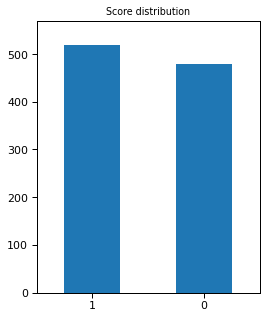

In [313]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print(X_sample.score.value_counts())

# plot barchart for X_sample
ymax = X_sample.score.value_counts().max()
X_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, ymax + 50],        
                                    rot = 0, fontsize = 11, figsize = (4,5))

#It's kind of difficult to see...

### 5.2 Feature Creation


In [314]:
# Feature creation using nltk
import nltk

# Make unigrams
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
X['unigrams'][:10]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
4    [The, best, scene, in, the, movie, was, when, ...
5    [The, rest, of, the, movie, lacks, art, ,, cha...
6                              [Wasted, two, hours, .]
7    [Saw, the, movie, today, and, thought, it, was...
8                             [A, bit, predictable, .]
9    [Loved, the, casting, of, Jimmy, Buffet, as, t...
Name: unigrams, dtype: object

In [315]:
#Check if the new feature was created. Yup!
X.head()

,sentence,score,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."


Another feature that's useful to create is the source.

In [316]:
source = ['imdb', 'yelp', 'amazon']

In [317]:
X['source'] = ''

# Use indices to determine the source
for i in range(len(X)):
    if i < 1000:
        X['source'][i] = 'imdb'
    elif i < 2000 and i >= 1000:
        X['source'][i] = 'yelp'
    elif i < 3000 and i >= 2000:
        X['source'][i] = 'amazon'

In [318]:
# Query to check whether it's succesfully created
X[999:1001]

,sentence,score,unigrams,source
999,All in all its an insult to one's intelligence...,0,"[All, in, all, its, an, insult, to, one, 's, i...",imdb
1000,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]",yelp


### 5.3 Feature Subset Selection

In [319]:
from sklearn.feature_extraction.text import CountVectorizer

# Use the count vectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1


In [320]:
# Use an analyzer
analyze = count_vect.build_analyzer()
analyze(X.loc[1,'sentence'])

['not',
 'sure',
 'who',
 'was',
 'more',
 'lost',
 'the',
 'flat',
 'characters',
 'or',
 'the',
 'audience',
 'nearly',
 'half',
 'of',
 'whom',
 'walked',
 'out']

In [321]:
X_counts.shape

(2999, 5155)

In [322]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

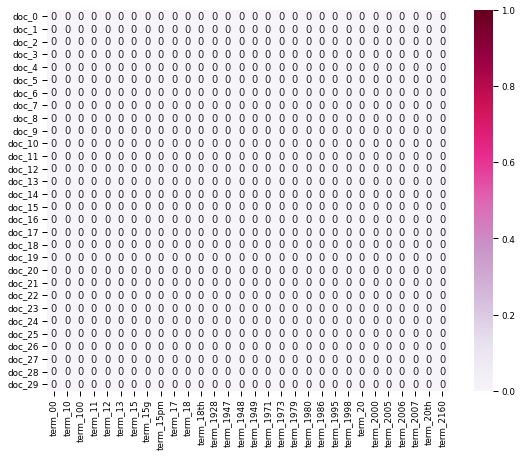

In [323]:
# Generating heatmap using seaborn
import seaborn as sns

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:30]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]

plot_z = X_counts[0:30, 0:30].toarray()
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [324]:
from sklearn.decomposition import PCA

In [325]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [326]:
X_reduced.shape

(2999, 2)

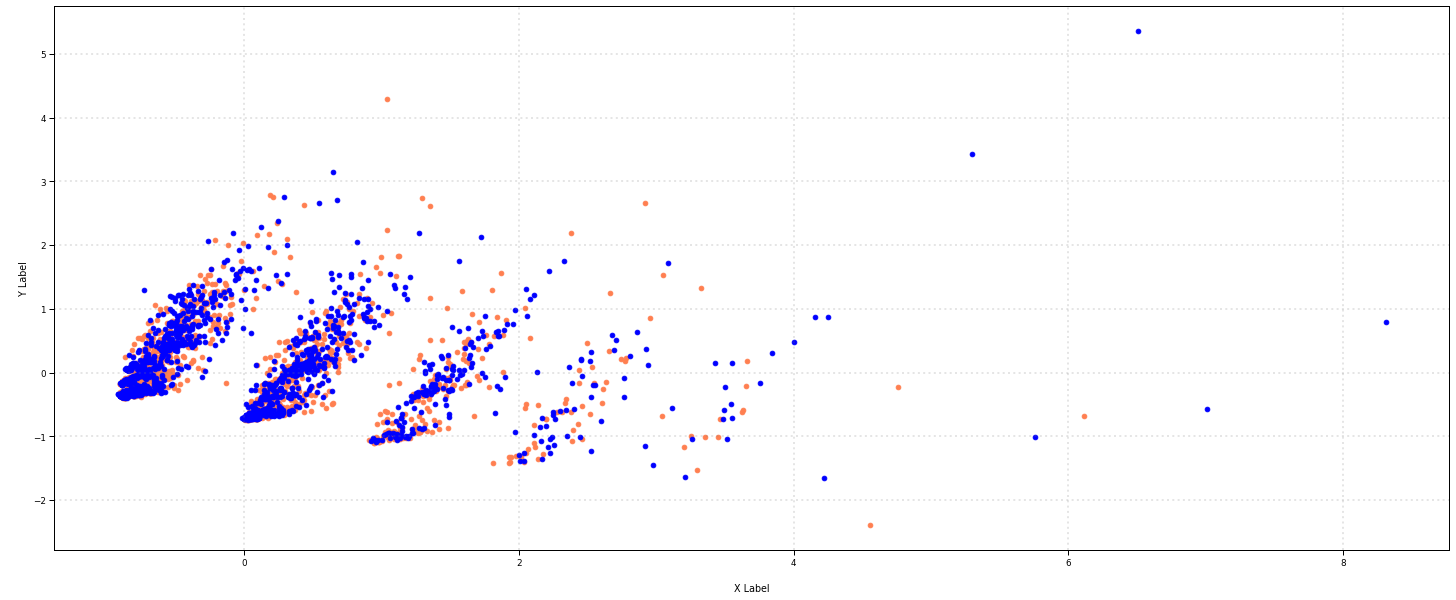

In [327]:
col = ['coral', 'blue', 'black', 'orange']
score = ['0','1']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, score):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [328]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [329]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

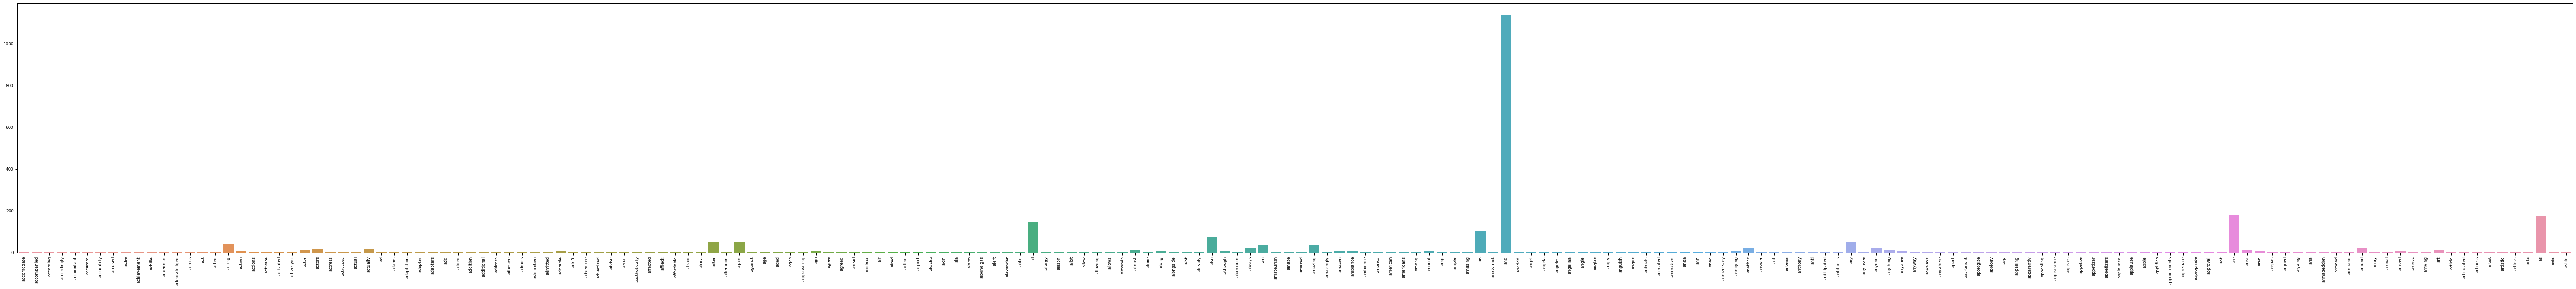

In [330]:
# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[100:300], 
            y=term_frequencies[100:300])
g.set_xticklabels(count_vect.get_feature_names_out()[100:300], rotation = 90);

In [331]:
# Use plotly for interactivity
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])],
    layout_title_text="Word Distribution"
)
fig.show()

In [332]:
# Use plotly to display top 20 used words
x = []

# sort the term frequencies in descending order
sorted_list = np.sort(term_frequencies)[::-1]
sorted_index = np.argsort(term_frequencies)[::-1] #get the indices to get the feature names

for i in sorted_index[:20]:
    x.append(count_vect.get_feature_names_out()[i])

# Plot visuals
fig = go.Figure(
    data=[go.Bar(x=x, y=sorted_list[:20])],
    layout_title_text="Top 20 Words Most Frequently Used"
)
fig.show()


In [333]:
# Use plotly to make a longtail graph

# Use previously created sorted_list

# Plot
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names_out()[sorted_index[:1000]], 
                 y=sorted_list[:1000])],
    layout_title_text="Long Tail"
)
fig.show()


### 5.6 Binarization

In [334]:
# Binarization of the source (imdb, yelp, amazon)

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.source)
X['bin_category'] = mlb.transform(X['source']).tolist()
X[999:1001]

,sentence,score,unigrams,source,bin_category
999,All in all its an insult to one's intelligence...,0,"[All, in, all, its, an, insult, to, one, 's, i...",imdb,"[0, 1, 0]"
1000,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]",yelp,"[0, 0, 1]"


---

# 3. Third


- Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

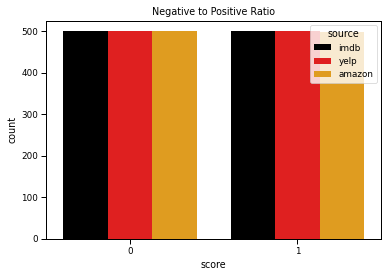

In [336]:
# Plotting the difference between likes and dislikes
# No difference because it's 50:50 haha but it's shaped 
# like a German flag... that's cool...

sns.set_context('paper')

# create plot 
colors = ['black', 'red', 'orange']
sns.countplot(x = 'score', hue = 'source', data = X, palette = colors)
plt.title('Negative to Positive Ratio')
plt.show()

---

### Below,

I will attempt to count the frequencies of **Top 50 Words** used in **Positive Reviews** versus in **Negative Reviews**.

In [337]:
# Divide the data between positive and negative reviews
X_positive = X.sentence[X.score == '1']
X_negative = X.sentence[X.score == '0']

# Instantiate different countvectorizers
count_pos = CountVectorizer()
count_neg = CountVectorizer()

# Creates term vectors of positive / negative words
X_pos_count = count_pos.fit_transform(X_positive)
X_neg_count = count_neg.fit_transform(X_negative)
print(count_pos.get_feature_names_out()[100:110])
print(count_neg.get_feature_names_out()[100:110])

['air' 'airport' 'akasha' 'alarm' 'alert' 'alexander' 'alike' 'all'
 'allot' 'allow']
['agreed' 'ahead' 'aimless' 'air' 'aired' 'airline' 'akin' 'ala'
 'albondigas' 'all']


In [390]:
pos_frequencies = []
for j in range(0,X_pos_count.shape[1]):
    pos_frequencies.append(sum(X_pos_count[:,j].toarray()))
    
neg_frequencies = []
for j in range(0,X_neg_count.shape[1]):
    neg_frequencies.append(sum(X_neg_count[:,j].toarray()))

In [391]:
pos_frequencies = np.asarray(X_pos_count.sum(axis=0))[0]
neg_frequencies = np.asarray(X_neg_count.sum(axis=0))[0]

In [393]:
# Use plotly to display top 50 positive words
x = []

# sort the term frequencies in descending order
pos_list = np.sort(pos_frequencies)[::-1]
pos_index = np.argsort(pos_frequencies)[::-1] #get the indices to get the feature names

for i in pos_index[:50]:
    x.append(count_pos.get_feature_names_out()[i])

# Plot visuals
fig = go.Figure(
    data=[go.Bar(x=x, y=pos_list[:50])],
    layout_title_text="Top 20 Words Used in Positive Reviews"
)
fig.show()


In [394]:
# Use plotly to display top 50 negative words
x = []

# sort the term frequencies in descending order
neg_list = np.sort(neg_frequencies)[::-1]
neg_index = np.argsort(neg_frequencies)[::-1] #get the indices to get the feature names

for i in neg_index[:50]:
    x.append(count_neg.get_feature_names_out()[i])

# Plot visuals
fig = go.Figure(
    data=[go.Bar(x=x, y=neg_list[:50])],
    layout_title_text="Top 50 Words Used in Negative Reviews"
)
fig.show()


- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    

In [396]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = X['sentence'] #take all the sentences from X

# Instantiate vectorizer
tfidf_vect = TfidfVectorizer()

# Generate TF-IDF term vector
X_tfidf = tfidf_vect.fit_transform(text)

# Check
tfidf_vect.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [397]:
X_tfidf.shape

(2999, 5155)

In [398]:
# create list of feature names
tfidf_tokens = tfidf_vect.get_feature_names_out()

In [399]:
# create pandas Dataframe of the tokens
tfidf_data = pd.DataFrame(data = X_tfidf.toarray(),
                            index = X.index,
                            columns = tfidf_tokens)

In [441]:
tfidf_data

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
# We can see the weights of the terms
print(X_tfidf[0])

  (0, 2764)	0.27349026705138396
  (0, 5139)	0.3177147321456224
  (0, 1401)	0.35707147582367305
  (0, 1331)	0.35707147582367305
  (0, 75)	0.19809224794012067
  (0, 2954)	0.16549826182051178
  (0, 166)	0.35707147582367305
  (0, 2956)	0.3098836120348186
  (0, 4133)	0.25817027760189154
  (0, 4890)	0.4609233641949015


---

- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


In [451]:
# Split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X_tfidf, X.score, test_size=0.30)

In [452]:
X_train

<2099x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 21906 stored elements in Compressed Sparse Row format>

In [453]:
# Import naive bayes library
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [454]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [455]:
y_pred = naive_bayes_classifier.predict(X_test)

In [456]:
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

accuracy:   0.831


---

# 4. Fourth
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

Answer:

1. **Heatmap**: I think the heatmap using the term vectors were inefficient because we have a sparse matrix. Heatmaps will be more meaningful when the data has strong correlation between 2 variables and the matrix is not sparse.

2. **Dimensionality Reduction**: it's not clear what we are looking at when seeing the scatter plot. This type of data might not be the right kind to use dimensionality reduction.

3. **Binarization**: I'm not sure what binarization does to the data. Maybe I'm not familiar yet with machine learning, but doing binarization seems redundant because we have the categories as integers.